In [3]:
import caiman as cm
from caiman.base.rois import register_multisession
from caiman.utils import visualization
from caiman.utils.utils import download_demo
from matplotlib import pyplot as plt
import numpy as np
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from caiman.mmapping import save_memmap
from scipy.sparse import csc_matrix
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
import os
from caiman.source_extraction.cnmf.utilities import detrend_df_f
import matplotlib.pyplot as plt

# detrend_df_f(quantileMin=8, frames_window=500)
# extract_DF_F(Yr, A, C, bl, quantileMin=8, frames_window=200, block_size=400, dview=None)

session = load_CNMF('/mnt/Brenna_Feb2023/TdTG7_18/TdTG7_18_012/field1_gui/caimanOuputs_2023_3_14_14_2/ConcatenatedMovie_MC_reg_caimanEval_Python.hdf5')


2023-04-07 13:28:37.523394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
dffDict = dict()

for cW in windowRange:
    dffDict[str(cW)] = 'test'

{'100': 'test', '200': 'test', '300': 'test', '400': 'test', '500': 'test', '600': 'test', '700': 'test', '800': 'test', '900': 'test', '1000': 'test', '1100': 'test', '1200': 'test', '1300': 'test', '1400': 'test'}


Oops!


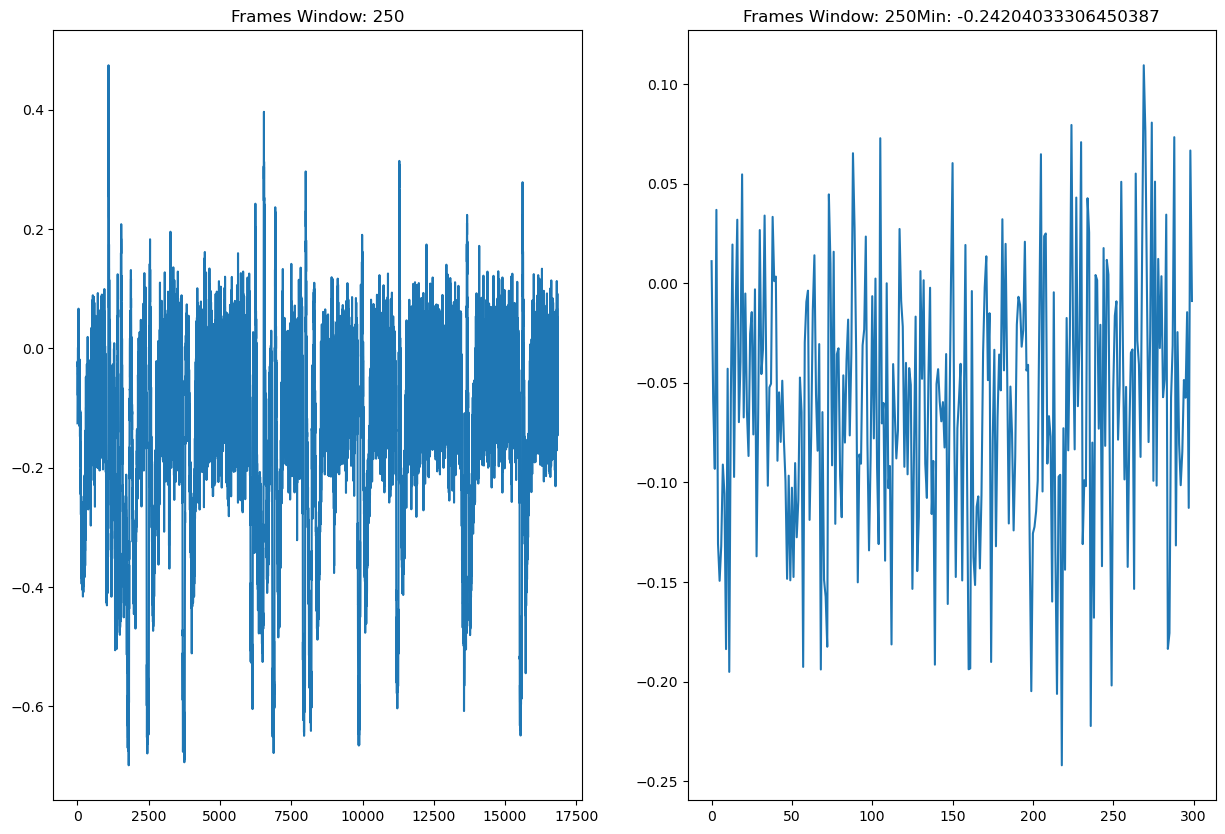

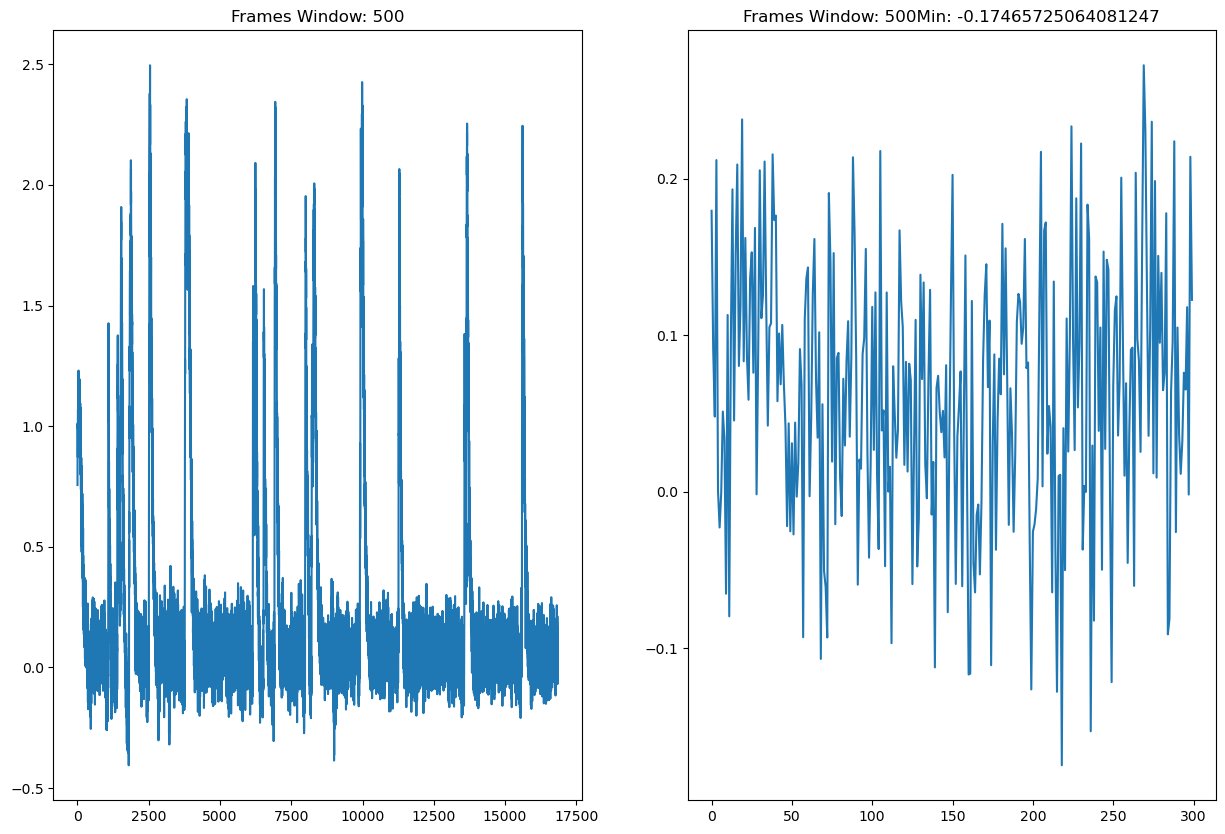

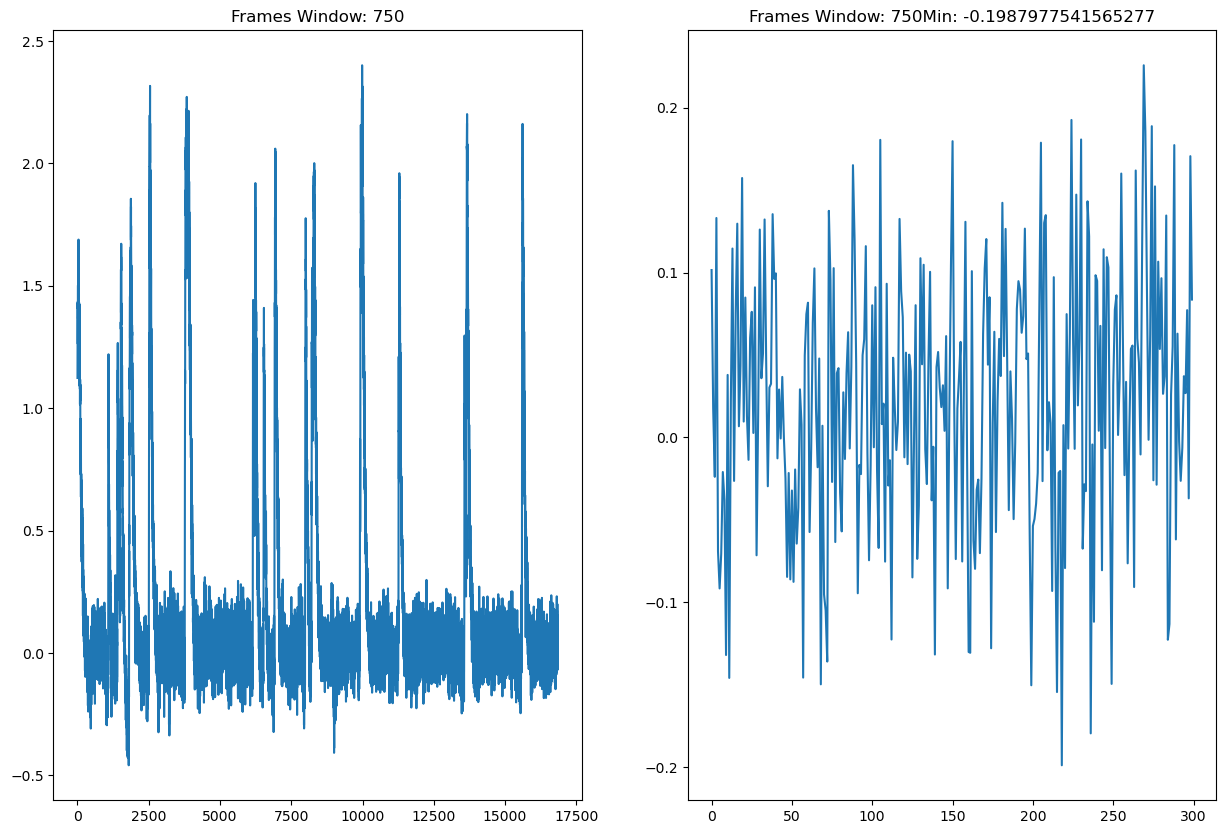

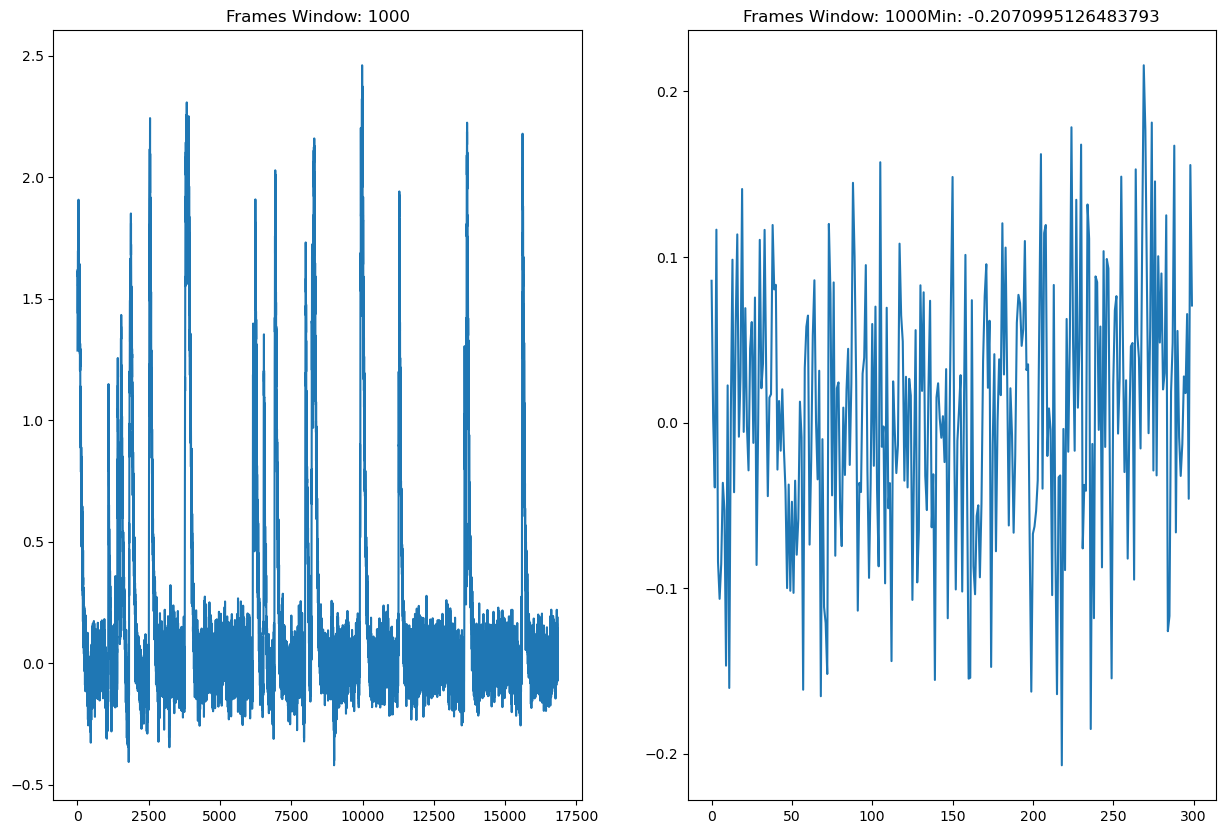

In [58]:
windowRange = [250,500, 750, 1000]
estimates = session.estimates

dffDict = dict()

minList = []
for cW in windowRange:
    currentDf = detrend_df_f(estimates.A, estimates.b, estimates.C, estimates.f, YrA=estimates.YrA, quantileMin = 8, frames_window = cW)
    roi = currentDf[137,:]
    between = roi[9200:9500]
    betweenMin = np.min(between)
    minList.append(betweenMin)
    dffDict[str(cW)] = currentDf
    plt.figure(figsize=[15,10])
    plt.subplot(1,2,1)
    plt.plot(roi)
    plt.title("Frames Window: " + str(cW))

    plt.subplot(1,2,2)
    plt.plot(between)
    plt.title("Frames Window: " + str(cW) + "Min: " + str(betweenMin))


In [2]:
print(vars(estimates))

NameError: name 'estimates' is not defined

In [ ]:
estimates = session.estimates
test = detrend_df_f(estimates.A, estimates.b, estimates.C, estimates.f, YrA=estimates.YrA, quantileMin=8, frames_window=100, 
                 flag_auto=True, use_fast=False, detrend_only=False)

In [ ]:
plt.figure(figsize = [15,10])
plt.plot(test[49])

In [33]:
test2 = detrend_df_f(estimates.A, estimates.b, estimates.C, estimates.f, YrA=estimates.YrA, quantileMin=8, frames_window=1000, 
                 flag_auto=True, use_fast=False, detrend_only=False)

In [51]:
roi = test2[49,:]

floVals = roi[12000:12600]
print(min(floVals))

-0.1855980532041037


In [60]:
500/32

15.625

(356, 16851)


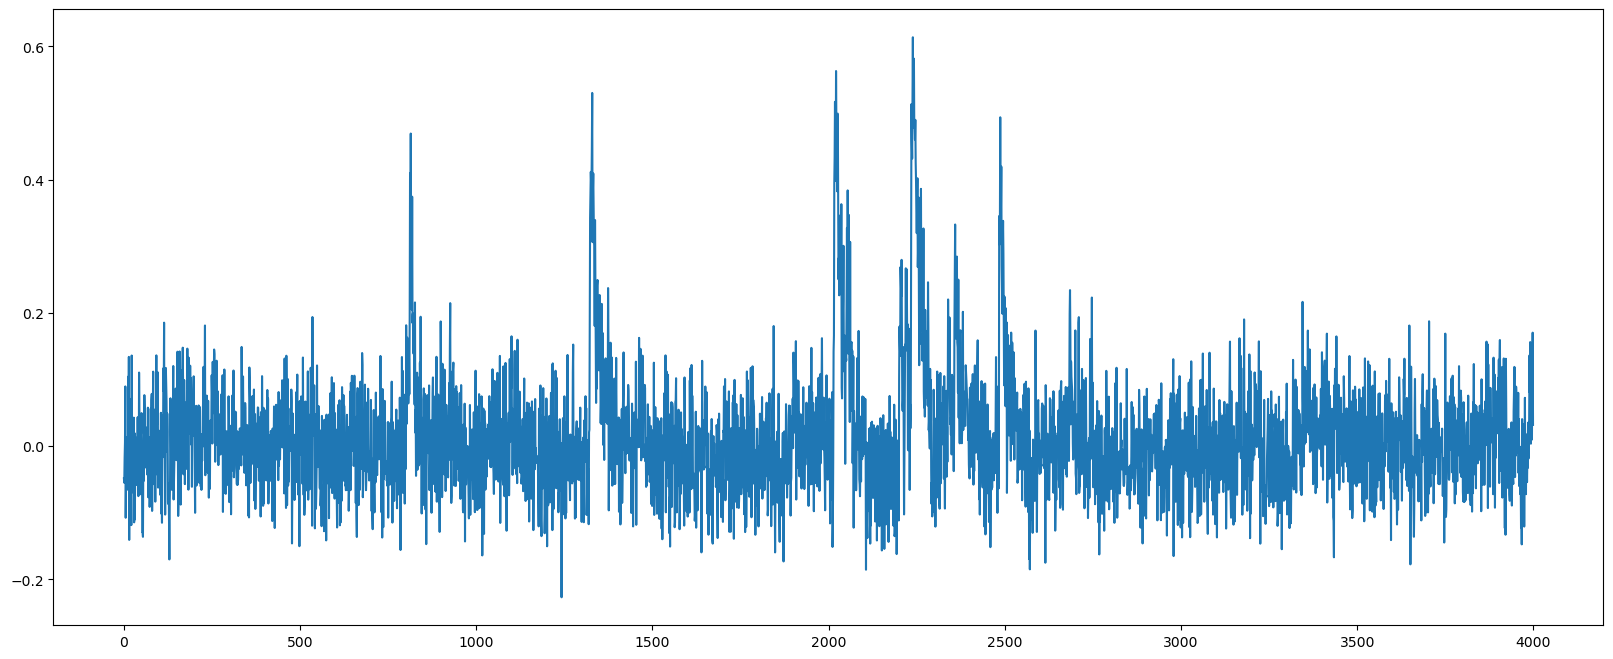

In [49]:
print(np.shape(test))

currentFlo = test[0,:]

plt.figure(figsize=(20, 8))
plt.plot(test2[49,10000:14000])